## 2-7. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?

그러면 바로 다양한 정보가 있을 때 모델을 설계하고 학습하는 과정도 바로 진행해 보도록 하겠습니다. 우리는 다변수 선형회귀를 사용할 겁니다.

### 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?

다변수 데이터에 대해 선형회귀를 하기 위한 데이터를 확인하고 모델 설계하기

자, 이번에 사용할 데이터에는 단 하나의 정보만이 담겨있지 않습니다. 여러 가지 변수로 하나의 값이 결정되죠.

우리는 이번에 손님 테이블에 대한 여러 가지 정보가 담긴 데이터셋으로 그 테이블이 낼 팁(tip)을 예측해 볼 것입니다.<br>
어떤 정보가 있고, 그 정보를 활용해서 효과적으로 팁을 예측할 수 있을지 실험해 보죠.

팁 데이터셋은 데이터 시각화 패키지인 seaborn 패키지 안에 포함되어 있습니다.<br>
seaborn은 matplotlib과 비슷하게 데이터에 대한 시각화를 제공하는 패키지로,<br>
간단하고 가벼운 그래프에 최적화 되어있는 matplotlib과 달리 시각화 자체의 기능을 더 살려서 예쁘고 다양한 형태의 그래프를 그릴 수 있도록 만들어진 패키지입니다.

seaborn은 간단한 데이터셋으로 여러 실험을 해 볼 수 있도록 샘플 데이터셋을 제공합니다.
제공되는 데이터셋은 다음 함수로 확인할 수 있습니다.

In [1]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

비행 데이터를 담은 flights, 붓꽃 데이터를 담은 iris 등 여러 가지 데이터가 있네요.
이 중 우리가 오늘 사용해 볼 팁 데이터는 sns.load_dataset("tips") 으로 가져올 수 있습니다.

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


총 244개의 행과 7개의 열로 이루어져 있군요.
각 데이터는 total_bill, tip, sex, smoker, day, time, size 7개의 정보를 담고 있습니다.

각 컬럼은 다음과 같은 정보를 나타내죠.

* total_bill : 테이블의 전체 지불 금액<br>
* tip : 팁으로 낸 금액<br>
* sex : 계산한 손님의 성별<br>
* smoker : 손님 중 흡연자 포함 여부<br>
* day : 요일<br>
* time : 시간<br>
* size : 테이블 인원수<br>

그런데 한 가지 문제가 있습니다.

바로 문자열 형태의 데이터가 몇몇 있다는 것이죠.<br>
우리는 위에서 살펴봤듯 수식에 데이터를 넣어서 계산할 것이기 때문에, 모든 데이터의 값이 실수여야 합니다.

따라서 다음과 같이 판다스의 get_dummies() 함수를 활용해 문자열 데이터에 대해서는 0, 1 로 변환해주겠습니다. <br>
수식을 구할 때 카테고리형 데이터가 있다면 더미 변수(dummy variable)를 활용해 식에 포함시켜 줄 수 있습니다.

(1) 더미변수란?



더미변수는 범주형 변수를 연속형 변수로 변환한 것인데, 정확히 따지자면 연속형 변수스럽게 만든 것이다.

연속형 변수

숫자로 이루어져 있으며, 끊키는 부분 없이 연속적으로 값을 가질 수 있다.

예를 들면 키, 몸무게, 온도, 나이, 고객수, 구매율 등



범주형 변수

문자 또는 숫자로 이루어져 있으며, 범주(카테고리)가 있다.

예를 들면 학년(1, 2, 3), 혈액형(A, B, O, AB), 성별(남, 여) 등



출처: https://kkokkilkon.tistory.com/37 [꼬낄콘의 분석일지]

범주형 변수로는 사용할 수 없고 연속형 변수로만 가능한 분석기법을 사용할 수 있게 해준다.



예를 들어 선형 회귀분석, 로지스틱 회귀분석 등 회귀분석 계열은 원래 설명변수가 연속형 변수여야지 사용할 수 있는 분석 기법이다.<br>
하지만 만약 설명변수 중에 범주형 변수가 섞여 있다면, 그 변수를 더미변수로 변환 즉, 연속형 변수스럽게 만들어서 회귀분석을 사용할 수 있다.


(3) 더미변수의 특징

1.  더미변수는 0 또는 1의 값을 가진다.<br>
해당 더미변수에 속하면 1 아니면 0의 값을 가진다. (기준이 되는 범주는 값이 0이 된다. 자세한 설명은 아래에 있다.)
2.  더미변수는 원래 범주형 변수의 범주 개수보다 1개 적게 만들어진다.<br>
예를 들어 원래 변수가 성별(남, 여)이라면 남성여부 또는 여성여부 둘 중에 하나만 만든다. (범주의 개수 2개, 더미변수 1개)<br>
원래 변수가 학년(1학년/2학년/3학년)이라면 1학년여부와 2학년여부 또는 2학년여부와 3학년여부 또는 1학년여부와 3학년여부 이렇게 만든다.<br> (범주의 개수 3개, 더미변수 2개)<br>
더미변수로 만들어지지 않고 생략되는 범주는 기준이 되는 값이라고 이해하면 된다.


(4) 더미변수 만드는 법

1.  범주형 변수의 범주 중 기준이 되는 값을 정한다.
2.  기준이 되는 변수를 제외하고 더미변수를 만든다.
이렇게 만든 더미변수 + 연속형 변수로 설명변수를 꾸려서 회귀분석을 돌리면 된다.

In [3]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


좋습니다! 문자열 데이터는 모두 사라지고, 대신 sex_Male, sex_Female과 같이 각 카테고리에 대한 컬럼이 새롭게 만들어졌습니다.

이렇게 내가 가지고 있는 데이터 중 실수형 데이터가 아닌 카테고리 데이터일 때에는 pandas의 get_dummies 함수로 간편하게 숫자 데이터로 변환해줄 수 있습니다.

이러한 데이터 변환 방식을 **원-핫 인코딩(One Hot Encoding) 이라고 하죠.** 이미 알고 계실 것이라 생각합니다!

그렇다면 꼭 해야 하는 것은 아니지만, 컬럼의 순서를 우리의 목적에 맞게 바꾸어보겠습니다.

우리는 나머지 모든 데이터를 가지고 최종적으로 tip 값을 예측하려고 합니다. 따라서 tip 컬럼을 맨 오른쪽에 두도록 하겠습니다.

In [4]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


위 데이터를 보시면 각 행에는 total_bill부터 time_Dinner까지, 총 12가지의 정보가 있습니다.<br>
그리고 12가지의 정보로부터 결정된 팁의 가격, tip값이 있죠<br>
그러면 우리는 모델을 어떻게 만들어볼 수 있을까요?<br>

이전에 입력 데이터가 "사용연수"로 단 한 개였을 때 우리는 모델을 다음과 같이 설정하였습니다.<br>

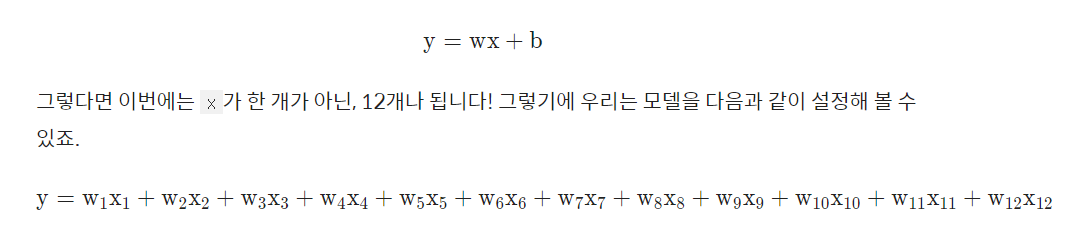

와우! 복잡해 보인다구요?
아니요, 식의 본질만 이해한다면 아주 간단합니다.

우리가 입력데이터 x가 단 하나였을 때 사용했던 가중치는 x와 곱했던 w, 그리고 상수 b로 두 개였죠.
이번에는 x 정보가 12개입니다. 따라서 같은 원리로 각 x값을 조정할 수 있도록 각각의 x에 각기 다른 w를 곱하고, 상수 b 는 단 하나를 더해주죠.

### 선형 회귀

이러한 식을 우리는 선형 방정식이라고 합니다. 다른 말로는 "다변수 일차방정식"이라고 할 수도 있죠.<br>
중요한 것은, 우리는 각각의 x에 개별 가중치를 곱해주는 것 말고는 다른 조작을 하지 않는다는 것입니다.<br>

이렇게 선형 방정식을 활용해서 원하는 값을 예측하는 모델을 설계하고 학습시키는 방법을 선형 회귀 라고 합니다.<br>
선형 회귀는 선형 방정식 을 통해 회귀 문제를 푼다 는 의미가 담겨 있습니다.<br>

이 중 특히 회귀 라는 단어는 연속된 실수값을 예측하는 문제 를 뜻합니다.<br>
회귀와 대립되는 개념은 분류 인데, 다음 예를 보면 가볍게 이해가 되실 겁니다.<br>

* 사진을 입력받아 해당 사진이 강아지인지, 고양이인지 맞추는 문제는 분류 문제입니다.<br>
* 사용연수, 화면크기 등을 입력받아 실수값인 중고 가격을 맞추는 문제는 회귀 문제입니다.

즉, 분류 문제는 맞추고자 하는 값이 카테고리 이고, 회귀 문제는 맞추고자 하는 값이 연속된 실수 값 입니다.

Q6. 집의 평수, 층, 위도와 경도 등을 입력받아 집의 가격을 맞추는 문제는 분류인가요, 회귀인가요?<br>

답 : 회귀 문제이다.

### 시각화

다만, 여기에서 안타까운 점이 하나 있습니다.  
우리는 위에서 x축과 y축을 활용해서 2차원 평면에 데이터를 찍어서 시각화할 수 있었습니다.  

만약 입력 데이터인 x가 x_1 , x_2 로 두 개이고, 그 두 값으로 y값이 정해진다면 다음과 같은 3차원 공간에 시각화를 해 볼 수 있겠죠.

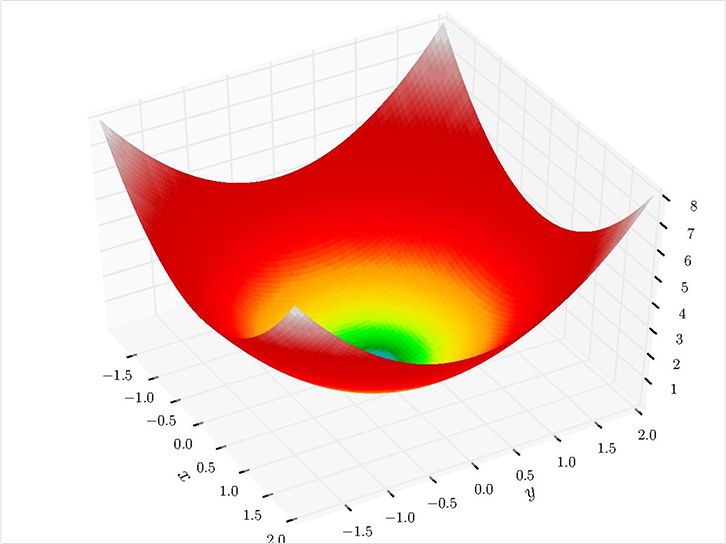

하지만, 입력 데이터 x가 3개 이상으로 늘어난다면 우리는 더이상 시각화를 할 수가 없게 됩니다.  
우리 존재가 3차원 공간에 살고 있기 때문에, 4차원 이상은 상상할 수도, 그려볼 수도 없기 때문이죠!

그렇기 때문에 2개 이상의 입력 변수가 있는 경우에는 데이터가 존재할 n차원의 공간을 어렴풋이 상상하며 최적의 함수를 찾을 뿐, 눈으로 확인할 수는 없습니다.  

그래도 단변수 데이터에 대해 시각화를 하며 모델이 어떻게 학습해나가는지를 확인하였으니, 변수의 개수 빼고는 그것과 완전히 동일한 방식을 사용한다는 것을 잊지 마세요!  

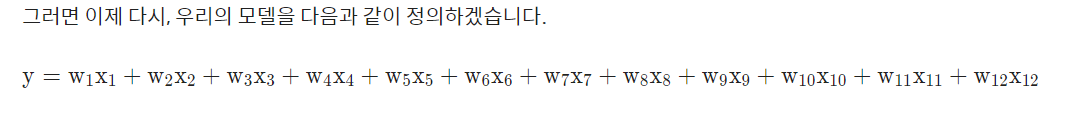

### 표기법

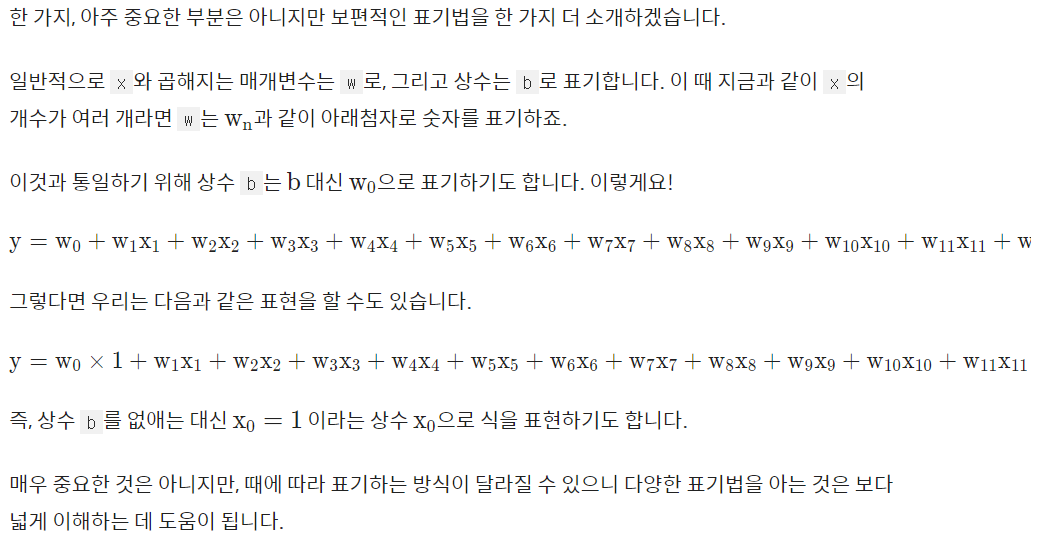

### 2-8. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (2) 다시 한 번 직접 설계해 보는 손실함수

다변수 데이터에 대해 선형회귀를 하기 위한 손실함수를 정의하기

그러면 이제 본격적으로 데이터를 준비하고 모델을 설계해서 학습을 시켜 보겠습니다!

먼저 데이터는 다음과 같이 준비하면 됩니다. 다만, 앞으로는 X는 하나의 값이 아닌 12개의 값을 가지는 벡터 이므로, 대문자로 표기하도록 하겠습니다.

In [5]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


아, 준비가 되어가고 있습니다.

한 가지 잊지 말아야 할 단계는, 데이터를 train 데이터와 test 데이터로 분리하는 것입니다.
모델이 일정량의 데이터로 학습한 뒤 그 모델을 공정하게 평가하기 위해서는 학습 과정에서 보지 못했던 데이터를 이용해야 한다는 점, 알고 계시죠?

sklearn 라이브러리에 내장되어 있는 train_test_split을 활용해 데이터를 분리해 보도록 하겠습니다.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


입력 데이터와 정답 데이터는 준비가 완료되었네요!

다음으로, W와 b는 랜덤한 값으로 초기값을 설정해주도록 하겠습니다. W 또한 벡터이므로 대문자를 사용합니다.

Q8. W 벡터에는 몇 개의 숫자가 들어가야 할까요? 또, b는 몇 개의 숫자로 이루어져 있을까요?  

w: 12 b 1개  

길이가 12인 W와 1개의 숫자인 b를 준비합니다.

In [8]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")

슝=3


In [9]:
W

array([0.69090141, 0.71831042, 0.61554695, 0.39492821, 0.58010261,
       0.07818439, 0.34077371, 0.66135217, 0.59498739, 0.48645578,
       0.5607999 , 0.4024343 ])

In [10]:
b

0.42352877733873584

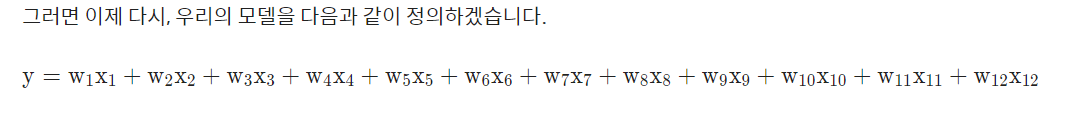

네, w에는 12개의 랜덤한 값으로 w_1 부터 w_10 가 담겼고, b![image.png](attachment:image.png)는 하나의 상수값이 담겼습니다.

다음은 모델을 준비하겠습니다. 모델은 이전 단계와 같이 x, w, b를 입력받는 함수입니다.
정확히는 다음 식을 연산하는 함수면 되죠.

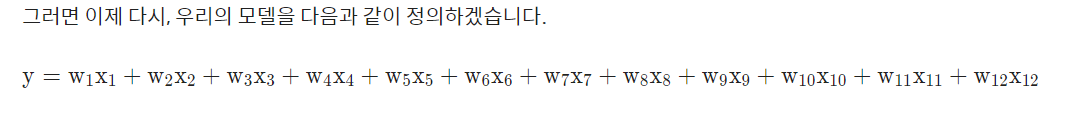

따라서 for 구문을 활용해 1부터 12까지 x * w를 수행하고, 마지막에 b를 더해주도록 하겠습니다.

In [11]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


간단하네요!

손실함수는 이번에는 RMSE 대신 MSE를 사용해 보겠습니다. 이전에 사용했던 RMSE는 단지 MSE의 제곱근이었으므로, 이번에는 제곱근하는 과정만 빼면 됩니다.



In [12]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


## 2-9. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기

MSE Loss에 대해 미분 공식을 활용해서 직접 그래디언트 수식을 구하고 함수 구현하기

다음은 기울기입니다.
기울기를 구하는 것은 이전보다는 조금 복잡합니다. 하지만 천천히 보면 어렵지 않습니다.

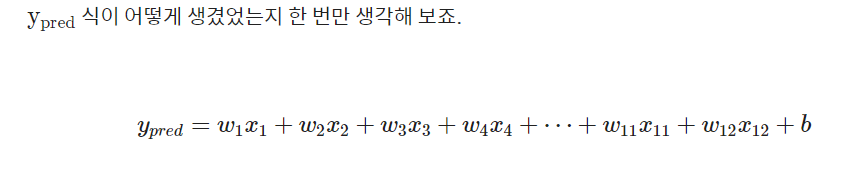

그러면 우리는 손실함수를 어떤 값에 대해 미분을 해야 했나요?
고등학생 때 단순히 무조건 x 로 미분하던 것과는 다른 상황입니다!

천천히 우리가 손실함수를 미분하는 이유를 다시 떠올려보면서 다음 질문에 답을 해 봅시다.

우리는 손실함수를 어떤 변수로 미분해야하나요? 다시 한 번 생각해 봅시다.

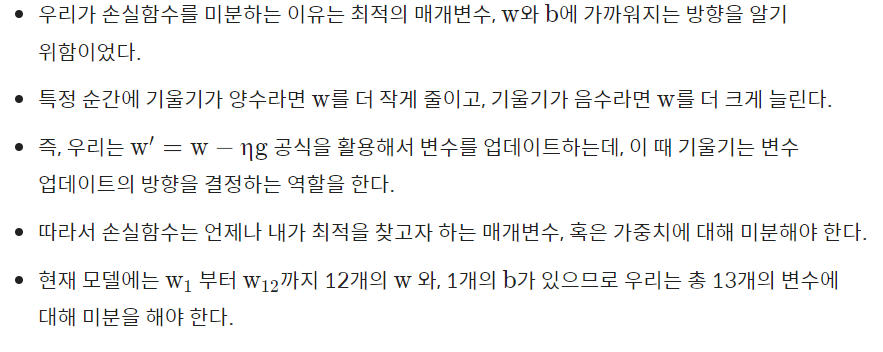

좋습니다. 우리는 총 13가지의 매개변수에 대해 손실함수를 13번 미분해야 하는군요.
여기서 간단하게 편미분의 개념이 들어가지만, 사실 어려울 것은 없습니다. 손실함수를 13개의 변수에 대해 각각 미분하겠다는 의미와 같으니까요!

그러면 13개의 미분식을 전부 쓰기는 조금 귀찮은 면이 있으니, 한 변수에 대한 미분식만 써보도록 하겠습니다.

손실함수를 w_i
 에 대해 미분을 하면 다음과 같아지겠군요

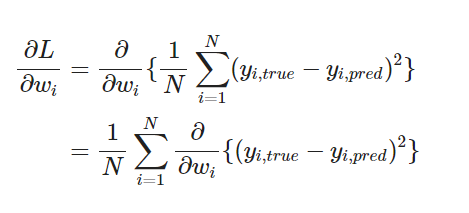

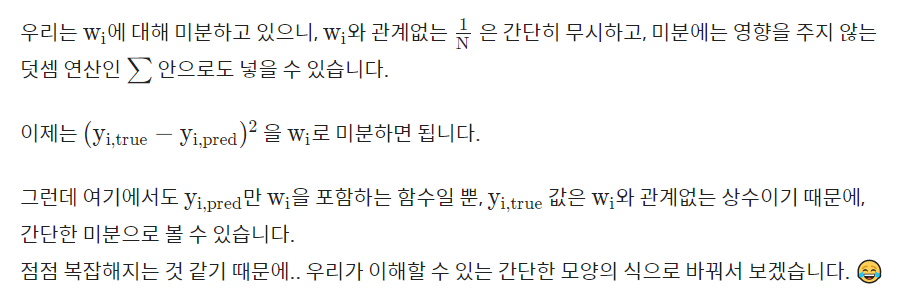

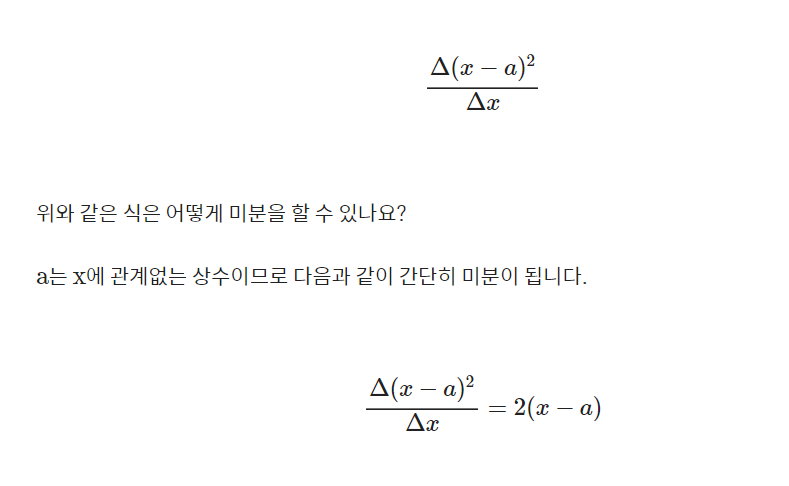

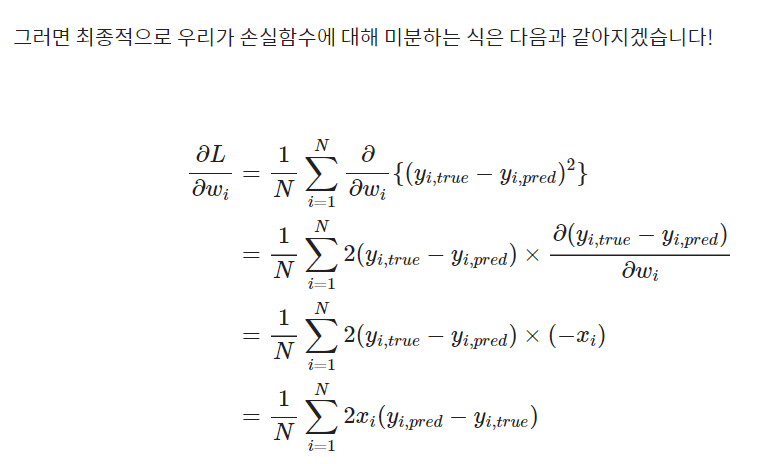

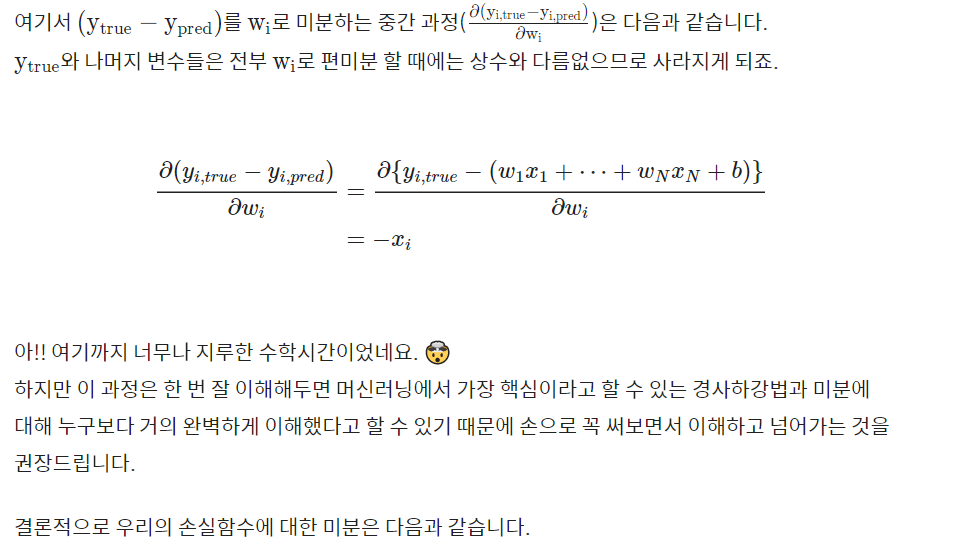

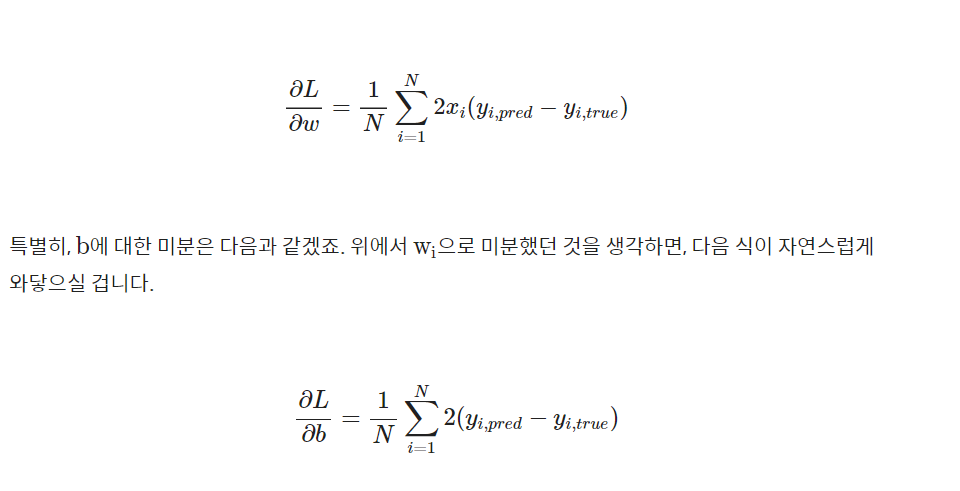

Q9. b에 대한 미분 결과는 w에 대한 미분 결과와 어떤 점이 다른가요?

미분 결과에 x가 들어가지 않는다. 이는 y_pred를 b로 미분하면 1이 되기 때문이다.

좋습니다! 이제 모든 과정이 이해됐군요. 이것을 그대로 구현하면 다음과 같습니다.



In [14]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


한번 실험삼아 경사(gradient)를 계산해 볼까요?

In [15]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [13863.75547884  1676.36676052   402.6370571    194.99641019
   241.51394921   356.11951808   136.88187718    41.66916958
   220.74826813   198.3341524    147.04113079   450.5923365 ]
db: 29.391809866996166


오호, w_1 부터 w_12 까지 12개의 기울기(gradient)값과, b의 기울기(gradient)를 효과적으로 구하는 것으로 보입니다.  
기울기까지 준비되었으니 이제 다음 단계로 가보시죠!


## 2-10. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (4) 모두 준비 되었다면, 모델 학습은 간단하다구!

직접 구현한 손실함수, 기울기 함수를 활용해 경사하강법으로 모델 학습하기

이제 모든 준비가 끝났으니 뭐만 하면 될까요?!
반복해서 가중치를 업데이트 하며 학습을 진행해 보시죠!

이번에는 학습률을 0.0001로 두겠습니다.

In [16]:
LEARNING_RATE = 0.0001

학습 과정은 위에서와 완전히 똑같습니다. gradient를 구하고, W와 b를 업데이트하고, 손실함수를 기록합니다.

In [18]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 1.1573
Iteration 200 : Loss 1.1496
Iteration 300 : Loss 1.1431
Iteration 400 : Loss 1.1377
Iteration 500 : Loss 1.1331
Iteration 600 : Loss 1.1292
Iteration 700 : Loss 1.1259
Iteration 800 : Loss 1.1230
Iteration 900 : Loss 1.1205
Iteration 1000 : Loss 1.1184


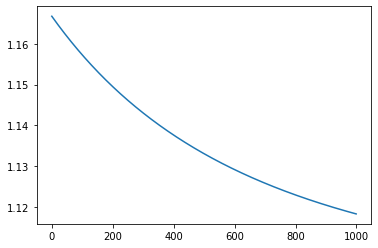

In [19]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

아주 효과적으로 잘 내려가는군요. W와 b의 값을 확인해 볼까요?

In [20]:
W, b

(array([ 0.0906887 ,  0.12974424,  0.17722263,  0.14024432, -0.08760762,
         0.05288641,  0.16364834,  0.46704572,  0.29251739,  0.46734939,
         0.24930947,  0.02091652]),
 0.38088211833067837)

그렇다면 X_test 데이터와 y_test 데이터에 대해서도 역시 예측을 해 보겠습니다.

학습때 보지 않은 test 데이터에 대해서는 loss값이 얼마나 될까요?

In [21]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.6585363347617517

꽤나 작게 잘 맞추는 것 같습니다.

마지막으로 우리의 모델이 예측한 prediction과 실제 정답인 y_test를 비교해서 얼마나 잘 맞추었는지 그래프로 확인해 보도록 하겠습니다.
X_test의 각 행의 첫 번째 데이터가 total_bill이므로, 다음과 같이 시각화를 하면 됩니다.

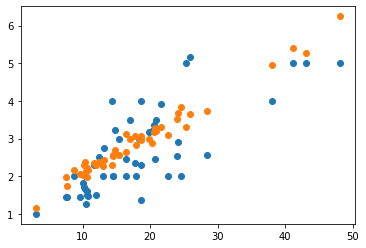

In [22]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

네, x축에는 total_bill을, y축에는 각각 tip값과 prediction 값을 표시하였습니다.

어떤가요, 꽤나 잘 맞추는 것 같지 않나요?!

### 2-11. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기 (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

모델 설계, 손실함수 정의, 기울기 계산 및 최적화 과정을 sklearn으로 진행하기

자, 이제 지금까지 학습한 모든 내용을 사이킷런(sklearn) 라이브러리를 활용해서 아주 편리하고 깔끔하게 진행해 보겠습니다.
사이킷런을 사용하면 모델이 학습하기 위한 손실함수, 기울기 계산을 직접할 필요가 없기 때문에 매우 간단하게 모델 학습이 완료됩니다.

먼저 우리가 사용했던 데이터를 똑같이 준비해 봅시다.

In [24]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print("슝=3")

슝=3


다음으로 위에서 했던 것과 같이 X와 y를 준비하겠습니다.

In [25]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


X와 y를 train 데이터와 test 데이터로 분리해 봅시다.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


자, 데이터가 준비되었으니 우리는 준비된 모델을 가져다 쓰기만 하면 됩니다.

선형회귀 모델은 sklearn.linear_model 안에 LinearRegression 로 내장되어 있습니다.

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("슝=3")

슝=3


이렇게 하면 모델 준비가 완료됩니다!

놀랍지 않나요? 가중치를 따로 선언할 필요도, 손실함수와 기울기를 계산할 필요도 없죠 하하 😅

모델 학습은 다음과 같이 입력 데이터에 해당하는 X_train과 정답 데이터에 해당하는 y_train을 넣어 fit 시키면 됩니다.

In [28]:
model.fit(X_train, y_train)

LinearRegression()

모델 학습이 완료되었네요!

이제 X_test 데이터에 대한 예측을 해 볼까요?

In [29]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

각각의 X 데이터에 대해 tip 데이터를 잘 예측한 것 같습니다.

그러면 이제 정답 데이터와 비교해 모델의 성능을 평가해 봅시다.
모델의 성능은 mse로 계산해 볼텐데, 이는 sklearn.metrics의 mean_squared_error에 들어있습니다.

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

0.7 정도의 성능으로, 이전 스텝에서 우리가 직접 만들었던 모델의 0.68과 유사한 성능을 보이는군요.
우리가 만들었던 모델도 나쁘지 않았던 것 같습니다.😊

In [ ]:
위에서 했던 것과 같이 X축에는 total_bill을, y 축에는 tip을 두고 시각화를 해 보겠습니다.

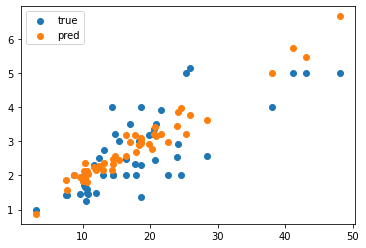

In [31]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

어떤가요? 조금은 더 잘 맞추는 것 같나요?!

정리
여기까지 잘 따라와 주신 여러분 정말 수고 많으셨습니다!👏👏 다시 배운 내용을 상기 해 보자면, 우리가 풀어본 문제는 머신러닝 중에서도 "선형 회귀" 문제였습니다.

사실 앞으로는 회귀 문제를 이렇게 풀지 않고 기울기나 모델 학습 과정은 텐서플로우에 내장된 편리한 함수들을 이용하게 될 것입니다.
하지만, 이미 편하게 쓸 수 있도록 구현되어 있는 라이브러리를 사용할 때에도 내가 무엇을 하려고 이 라이브러리를 사용하고 있는지를 이해하고 쓰는 것과 아닌 것은 매우 큰 차이가 있죠!

* 입력데이터인 X, 정답데이터인 y, 모델의 출력인 prediction, 각각의 개념을 알고, 정답데이터에 가까운 출력을 낼 수 있도록 학습한다는 철학을 이해해 보았고,  


* 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류를 알아보았으며 직접 구현해 보았습니다.  

* 또한, 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현을 수치미분과 해석미분 두 가지 방법으로 진행했죠.  

* 그리고, 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익혀보았습니다.  

* 마지막으로는 사이킷런을 활용해서 간편하고 빠르게 선형 회귀를 진행해 보기도 했어요! 

이 모든 내용을 완벽하게 소화했다고 느낀다면, 분명 앞으로 달리 보이는 것들이 있으실 겁니다!  

잘 이해가 안 되었던 수식 또는 내용이 있었다면 꼭 정리를 해 보고, 복습도 해 보시는 것을 권장드립니다.

그러면 배운 내용을 토대로 프로젝트를 진행하고 마무리하겠습니다 👏🏼